In [54]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Problem 1: Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

### 1.1) Data Ingestion and EDA

In [2]:
df_Zr = pd.read_csv('cubic_zirconia.csv')

In [3]:
df_Zr

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [57]:
df_Zr.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df_Zr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


### Checking the shape of the Dataset

In [5]:
df_Zr.shape

(26967, 11)

In [6]:
df_Zr.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,13484.000000,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


### Checking for duplicated values

In [7]:
dups = df_Zr.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df_Zr[dups]

Number of duplicate rows = 0


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price


In [8]:
Zr_df = df_Zr.drop('Unnamed: 0', axis=1)

In [9]:
Zr_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [10]:
dups = Zr_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
Zr_df[dups]

Number of duplicate rows = 34


,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [11]:
Zr_df = Zr_df.drop_duplicates()
dups = Zr_df.duplicated() 
print('Duplicated rows = %d' % (dups.sum()))

Duplicated rows = 0


### Checking the data types of the Variables

In [12]:
Zr_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

### Imputing Missing Values

### Checking for Null Values

In [13]:
Zr_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [14]:
for column in Zr_df.columns:
    if Zr_df[column].dtype != 'object':
        mean = Zr_df[column].mean()
        Zr_df[column] = Zr_df[column].fillna(mean)    
        
Zr_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### 1.2) Checking Values that are equal to 0 

In [15]:
Zr_df.eq(0).any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
x           True
y           True
z           True
price      False
dtype: bool

In [16]:
Zr_df[Zr_df['x']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [17]:
Zr_df[Zr_df['y']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [18]:
Zr_df[Zr_df['z']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


### Converting into Dummy Variables

### 1.3) Data Encoding Process : Unique Counts of the Object Variables

In [19]:
Zr_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [20]:
for column in Zr_df.columns:
    if Zr_df[column].dtype == 'object':
        print(column.upper(),': ',Zr_df[column].nunique())
        print(Zr_df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


CLARITY :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




In [21]:
Zr_df = pd.get_dummies(Zr_df, drop_first=True)
Zr_df.head().T

,0,1,2,3,4
carat,0.30,0.33,0.90,0.42,0.31
depth,62.10,60.80,62.20,61.60,60.40
table,58.00,58.00,60.00,56.00,59.00
x,4.27,4.42,6.04,4.82,4.35
y,4.29,4.46,6.12,4.80,4.43
z,2.66,2.70,3.78,2.96,2.65
price,499.00,984.00,6289.00,1082.00,779.00
cut_Good,0.00,0.00,0.00,0.00,0.00
cut_Ideal,1.00,0.00,0.00,1.00,1.00
cut_Premium,0.00,1.00,0.00,0.00,0.00


### Univariate Analysis

### Checking for Outliers

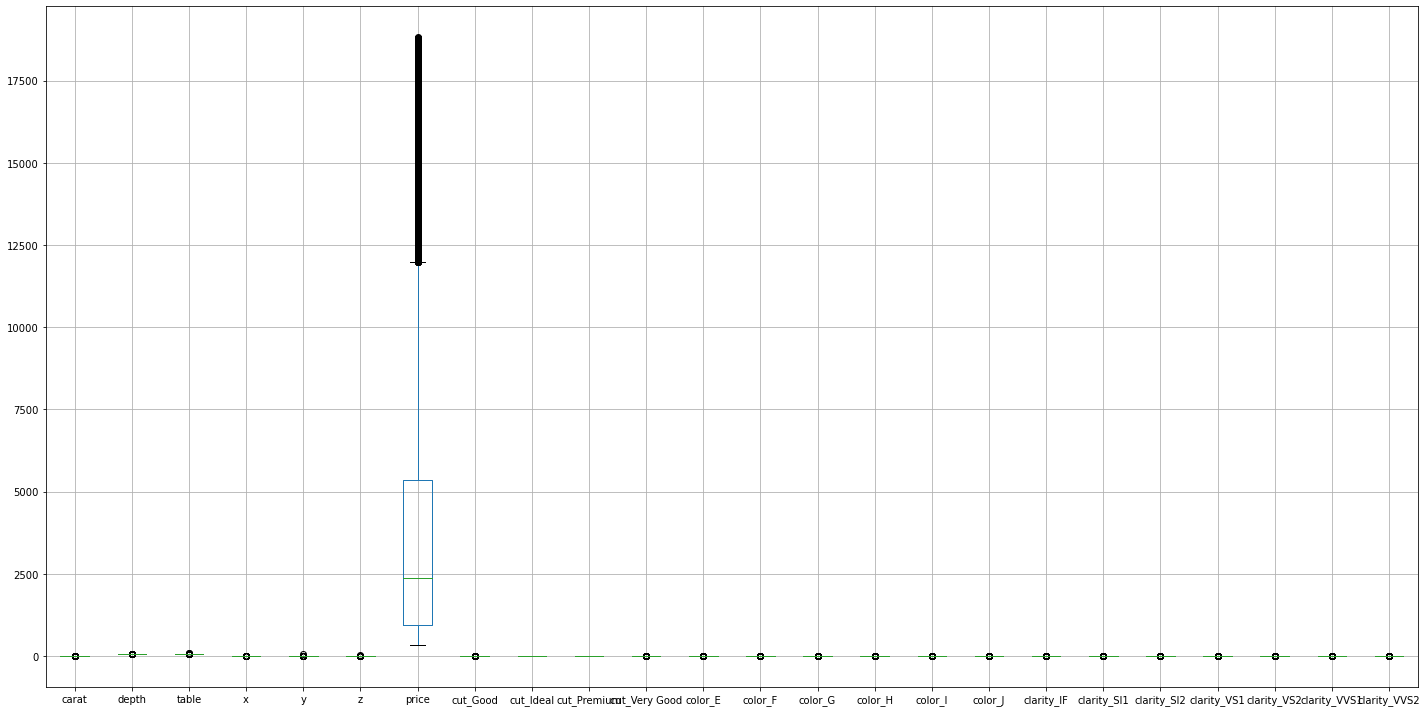

In [22]:
plt.figure(figsize=(20,10))
Zr_df.boxplot()
plt.tight_layout()

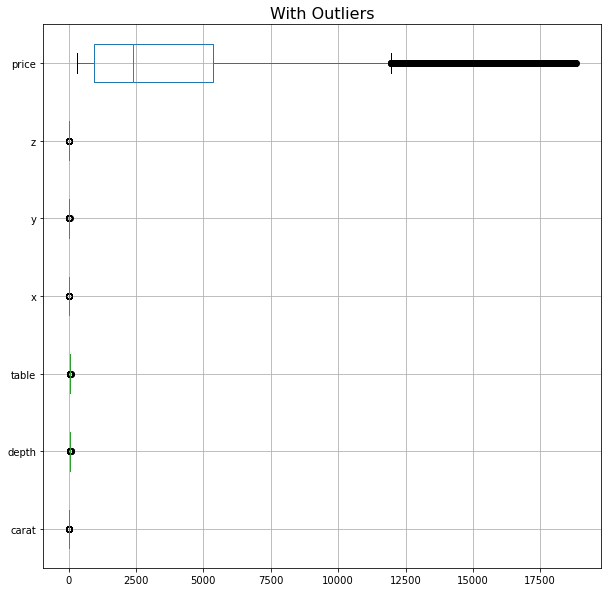

In [23]:
# construct box plot for continuous variables
cont=Zr_df.dtypes[(Zr_df.dtypes!='uint8') & (Zr_df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
Zr_df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

### Removing Outliers

In [24]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [25]:
for column in Zr_df[cont].columns:
    lr,ur=remove_outlier(Zr_df[column])
    Zr_df[column]=np.where(Zr_df[column]>ur,ur,Zr_df[column])
    Zr_df[column]=np.where(Zr_df[column]<lr,lr,Zr_df[column])

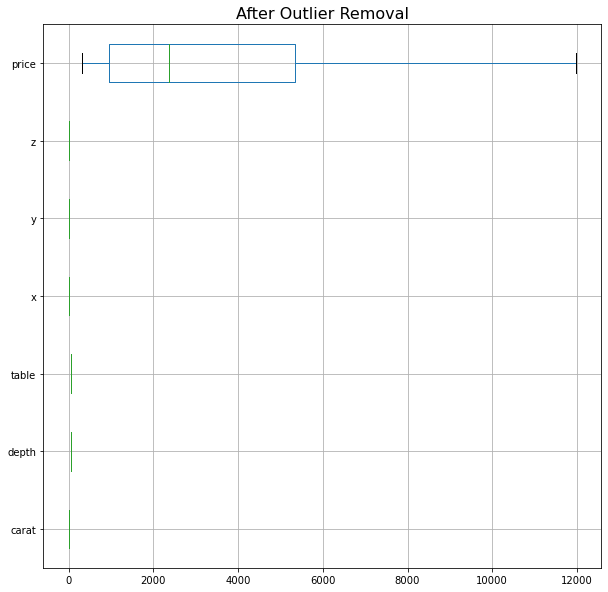

In [26]:
plt.figure(figsize=(10,10))
Zr_df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

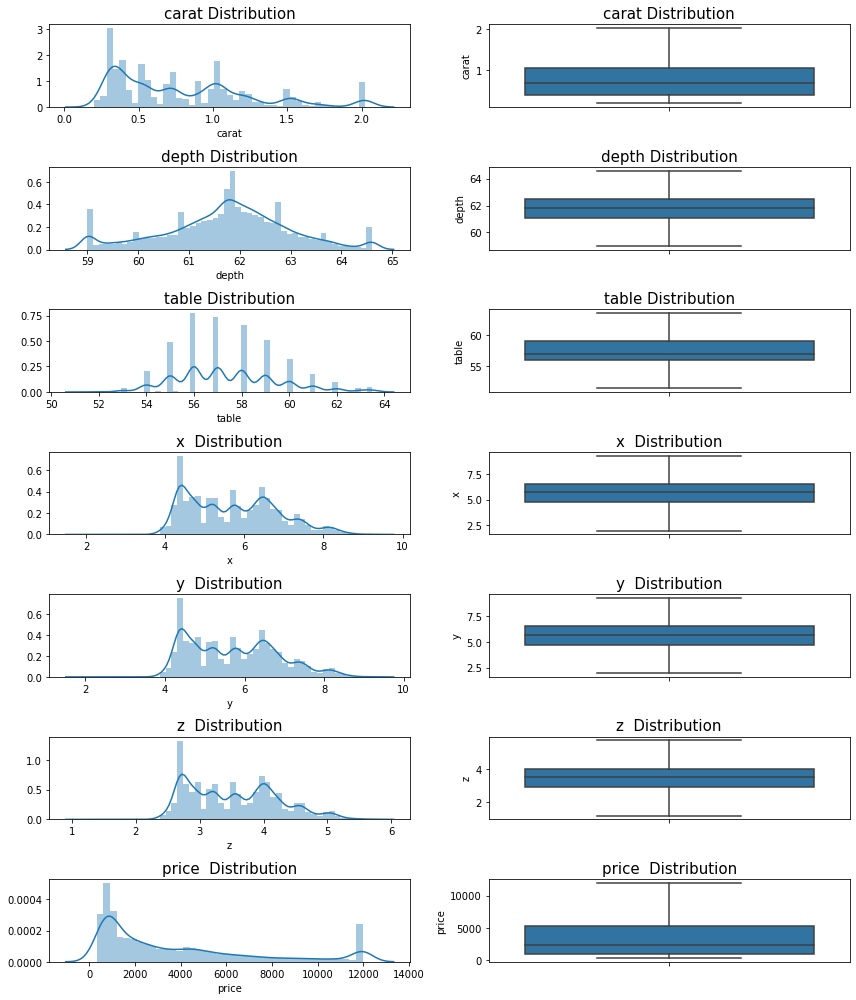

In [27]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(Zr_df['carat'] , ax=axes[0][0])
a.set_title("carat Distribution",fontsize=15)

a = sns.boxplot(Zr_df['carat'] , orient = "v" , ax=axes[0][1])
a.set_title("carat Distribution",fontsize=15)

a = sns.distplot(Zr_df['depth'] , ax=axes[1][0])
a.set_title("depth Distribution",fontsize=15)

a = sns.boxplot(Zr_df['depth'] , orient = "v" , ax=axes[1][1])
a.set_title("depth Distribution",fontsize=15)

a = sns.distplot(Zr_df['table'] , ax=axes[2][0])
a.set_title("table Distribution",fontsize=15)

a = sns.boxplot(Zr_df['table'] , orient = "v" , ax=axes[2][1])
a.set_title("table Distribution",fontsize=15)

a = sns.distplot(Zr_df['x'] , ax=axes[3][0])
a.set_title("x  Distribution",fontsize=15)

a = sns.boxplot(Zr_df['x'] , orient = "v" , ax=axes[3][1])
a.set_title("x  Distribution",fontsize=15)

a = sns.distplot(Zr_df['y'] , ax=axes[4][0])
a.set_title("y  Distribution",fontsize=15)

a = sns.boxplot(Zr_df['y'] , orient = "v" , ax=axes[4][1])
a.set_title("y  Distribution",fontsize=15)

a = sns.distplot(Zr_df['z'] , ax=axes[5][0])
a.set_title("z  Distribution",fontsize=15)

a = sns.boxplot(Zr_df['z'] , orient = "v" , ax=axes[5][1])
a.set_title("z  Distribution",fontsize=15)

a = sns.distplot(Zr_df['price'] , ax=axes[6][0])
a.set_title("price  Distribution",fontsize=15)

a = sns.boxplot(Zr_df['price'] , orient = "v" , ax=axes[6][1])
a.set_title("price  Distribution",fontsize=15)

plt.tight_layout()
plt.show()

### Bivariate Analysis

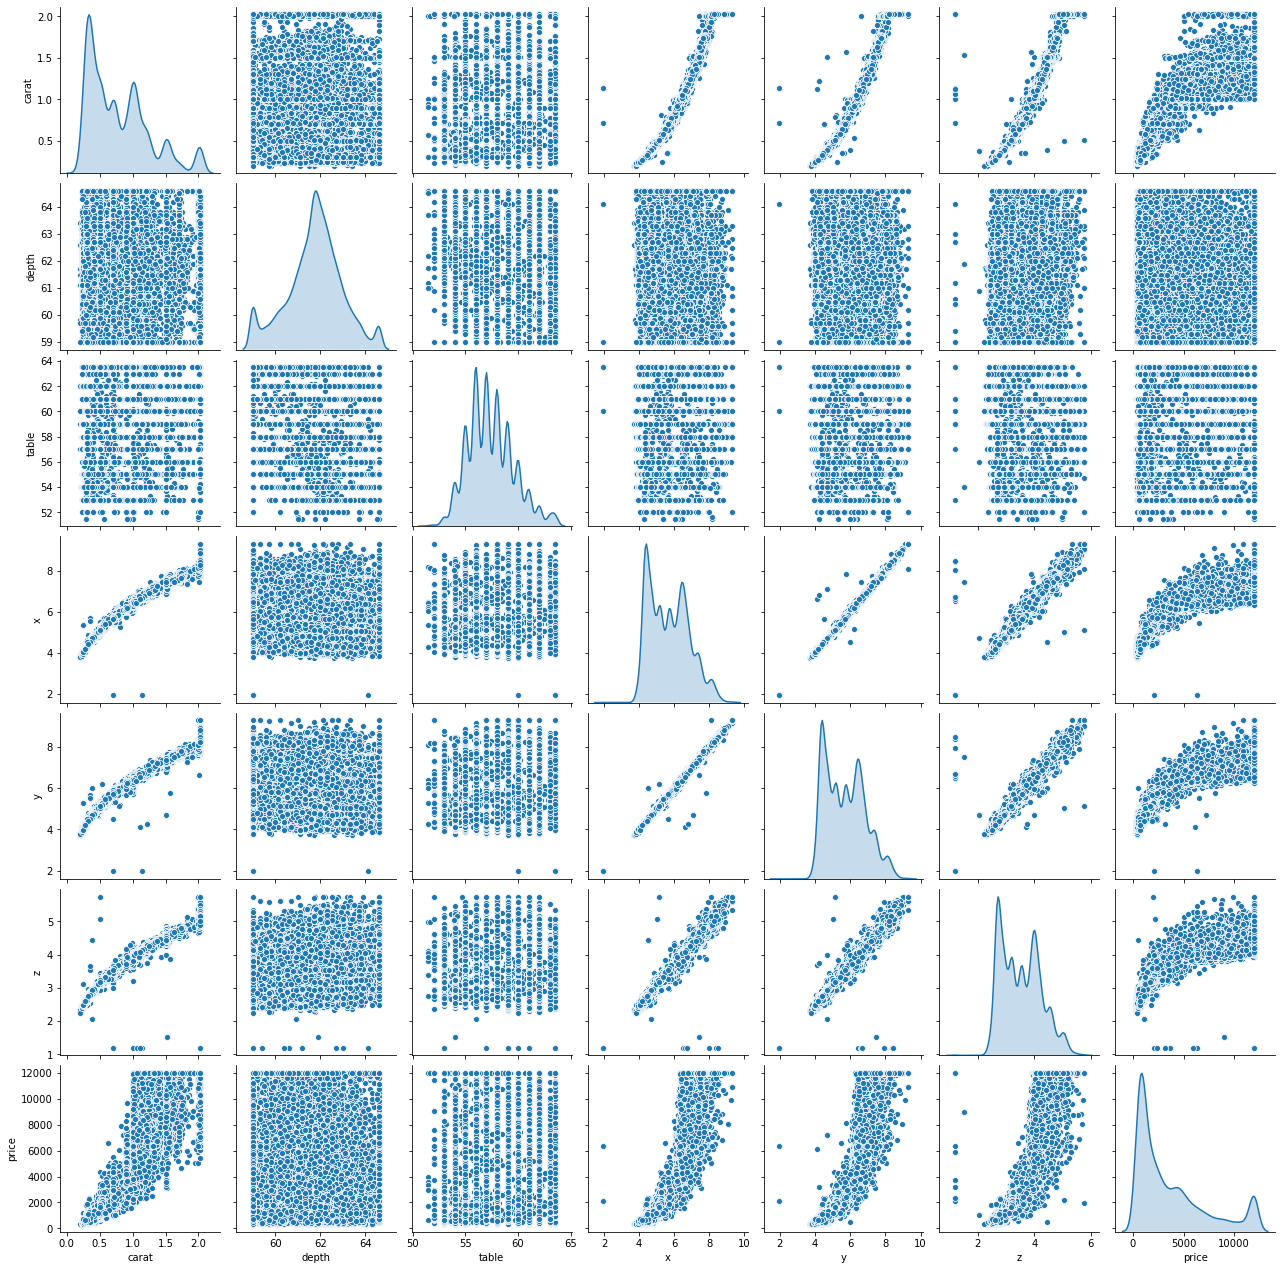

In [28]:
df_attr = (Zr_df[cont])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

### Correlation

<AxesSubplot:>

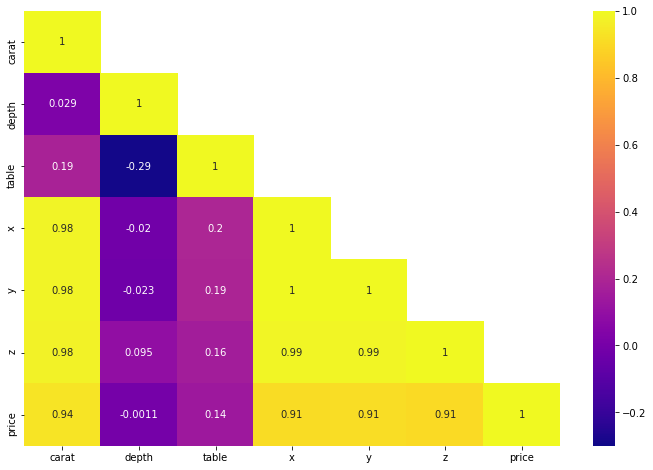

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(df_attr.corr(),annot=True,mask=np.triu(df_attr.corr(),+1),cmap='plasma',vmin=-0.3,vmax=1)

### 1.3) Data Split: Splitting the data into test and train (70:30)

In [30]:
# Copy all the predictor variables into X dataframe
X = Zr_df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = Zr_df[['price']]

In [31]:
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [33]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 9126.935473085714
The coefficient for depth is -15.014217086543132
The coefficient for table is -18.585737800296275
The coefficient for x is -1190.2764345693465
The coefficient for y is 837.3571162351325
The coefficient for z is -163.63972971378817
The coefficient for cut_Good is 481.81317674237306
The coefficient for cut_Ideal is 714.6462582809941
The coefficient for cut_Premium is 674.7718766421897
The coefficient for cut_Very Good is 606.8966608949822
The coefficient for color_E is -181.90971392494376
The coefficient for color_F is -256.8126005959224
The coefficient for color_G is -429.3811166093729
The coefficient for color_H is -855.9905492743865
The coefficient for color_I is -1323.929119406303
The coefficient for color_J is -1928.051698760263
The coefficient for clarity_IF is 4004.0105923483275
The coefficient for clarity_SI1 is 2519.9221298560683
The coefficient for clarity_SI2 is 1684.4607118200468
The coefficient for clarity_VS1 is 3342.5738532645

In [35]:
regression_model.coef_[0]

array([ 9126.93547309,   -15.01421709,   -18.5857378 , -1190.27643457,
         837.35711624,  -163.63972971,   481.81317674,   714.64625828,
         674.77187664,   606.89666089,  -181.90971392,  -256.8126006 ,
        -429.38111661,  -855.99054927, -1323.92911941, -1928.05169876,
        4004.01059235,  2519.92212986,  1684.46071182,  3342.57385326,
        3039.93169   ,  3772.29780517,  3757.77885464])

In [36]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1846.1321915931412


In [37]:
regression_model.score(X_train, y_train)

0.9402045563259678

In [38]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)


0.941907446217884

In [55]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

847.4553077020495

In [56]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

837.3145346413883

In [39]:
y_train.mean()

price    3736.335729
dtype: float64

### Linear Regression using statsmodels

In [40]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
22114,0.34,62.4,60.0,4.41,4.44,2.76,0,0,0,1,...,0,0,0,0,0,0,1,0,0,537.0
2275,0.30,61.2,55.0,4.35,4.31,2.65,0,1,0,0,...,0,0,0,0,0,0,1,0,0,844.0
19183,0.50,62.5,57.0,5.09,5.05,3.17,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1240.0
5030,1.10,63.3,56.0,6.53,6.58,4.15,1,0,0,0,...,0,0,0,0,1,0,0,0,0,4065.0
25414,1.02,61.1,62.0,6.54,6.49,3.98,0,0,1,0,...,0,0,0,0,1,0,0,0,0,4057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10962,0.29,61.3,55.0,4.25,4.28,2.61,0,1,0,0,...,0,0,1,0,0,0,0,0,0,673.0
17304,0.70,61.6,57.0,5.72,5.77,3.54,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1657.0
5193,1.22,60.6,61.0,6.94,6.88,4.19,0,0,1,0,...,1,0,0,0,0,1,0,0,0,6354.0
12179,1.03,64.4,61.0,6.33,6.25,4.05,0,0,0,0,...,0,0,0,1,0,0,0,0,0,4845.0


In [41]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [42]:
data_train.rename(columns = {"cut_Very Good": "cut_Very_Good"}, inplace = True)

data_test.rename(columns = {"cut_Very Good": "cut_Very_Good"}, inplace = True)

In [43]:
expr = 'price ~ carat + depth + table + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'

In [44]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept       -1846.132192
carat            9126.935473
depth             -15.014217
table             -18.585738
x               -1190.276435
y                 837.357116
z                -163.639730
cut_Good          481.813177
cut_Ideal         714.646258
cut_Premium       674.771877
cut_Very_Good     606.896661
color_E          -181.909714
color_F          -256.812601
color_G          -429.381117
color_H          -855.990549
color_I         -1323.929119
color_J         -1928.051699
clarity_IF       4004.010592
clarity_SI1      2519.922130
clarity_SI2      1684.460712
clarity_VS1      3342.573853
clarity_VS2      3039.931690
clarity_VVS1     3772.297805
clarity_VVS2     3757.778855
dtype: float64

In [45]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.287e+04
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        02:29:05   Log-Likelihood:            -1.5386e+05
No. Observations:               18853   AIC:                         3.078e+05
Df Residuals:                   18829   BIC:                         3.080e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1846.1322    661.115     -2.792

In [46]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [47]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

847.455307702049

In [48]:
np.sqrt(lm1.mse_resid) #another way

847.9952314994517

In [49]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

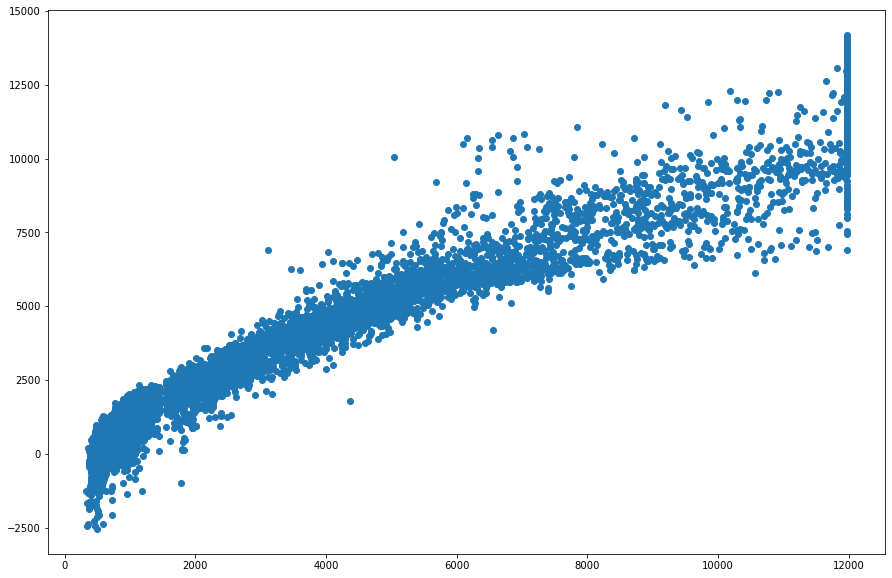

In [50]:
plt.figure(figsize=(15,10))
plt.scatter(y_test['price'], y_pred)
plt.show()

In [51]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-1846.13) * Intercept + (9126.94) * carat + (-15.01) * depth + (-18.59) * table + (-1190.28) * x + (837.36) * y + (-163.64) * z + (481.81) * cut_Good + (714.65) * cut_Ideal + (674.77) * cut_Premium + (606.9) * cut_Very_Good + (-181.91) * color_E + (-256.81) * color_F + (-429.38) * color_G + (-855.99) * color_H + (-1323.93) * color_I + (-1928.05) * color_J + (4004.01) * clarity_IF + (2519.92) * clarity_SI1 + (1684.46) * clarity_SI2 + (3342.57) * clarity_VS1 + (3039.93) * clarity_VS2 + (3772.3) * clarity_VVS1 + (3757.78) * clarity_VVS2 + 

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [60]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1


carat ---> 114.5544243732386
depth ---> 1096.8638589921288
table ---> 875.016455767293
x ---> 11747.64166337487
y ---> 11282.005069305675
z ---> 2020.2383396720888
cut_Good ---> 4.4425099258342575
cut_Ideal ---> 17.332329268755934
cut_Premium ---> 10.600021413766122
cut_Very Good ---> 9.81864530240622
color_E ---> 2.480791752625869


## Conclusion
### The final Linear Regression equation is

#### price = (-1846.13) * Intercept + (9126.94) * carat + (-15.01) * depth + (-18.59) * table + (-1190.28) * x + (837.36) * y + (-163.64) * z + (481.81) * cut_Good + (714.65) * cut_Ideal + (674.77) * cut_Premium + (606.9) * cut_Very_Good + (-181.91) * color_E + (-256.81) * color_F + (-429.38) * color_G + (-855.99) * color_H + (-1323.93) * color_I + (-1928.05) * color_J + (4004.01) * clarity_IF + (2519.92) * clarity_SI1 + (1684.46) * clarity_SI2 + (3342.57) * clarity_VS1 + (3039.93) * clarity_VS2 + (3772.3) * clarity_VVS1 + (3757.78) * clarity_VVS2 

----------------------------------------------------------------------------------------------------------------------------------